In [74]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import re as re
from bs4 import BeautifulSoup

In [75]:
property_list1 = []
URL = "https://www.gumtree.sg/s-property-for-rent/"
req = requests.get(URL + "v1c12p1")
contents = req.content
soup = BeautifulSoup(contents, "html.parser")
all_houses_page1 = soup.find_all("div", class_ = "tileV1")
for house_price in all_houses_page1:
        dataframe ={}
        a = house_price.find_all("div", class_ = "info")
        b = house_price.find_all("div", class_ = "category-location")
        locations = b[0].find_all("span")[0].text.split(",")[1][1:].replace(" ","")
        dataframe['Property Details'] = house_price.a.text
        dataframe['Price'] = a[0].find_all("span")[0].text.replace("\n", "")
        dataframe['Location'] = locations.split("/")
        property_list1.append(dataframe)

In [76]:
property_list = []
URL = "https://www.gumtree.sg/s-property-for-rent/"
for page in range(2,9):
    req =  requests.get(URL + "page-" + str(page) + "/v1c12p" + str(page))
    contents = req.content
    soup = BeautifulSoup(contents, "html.parser")
    allhouses = soup.find_all("div", class_ = "tileV1")
    for house_price in allhouses:
        dataframe = {}
        a = house_price.find_all("div", class_ = "info")
        b = house_price.find_all("div", class_ = "category-location")
        locations = b[0].find_all("span")[0].text.split(",")[1][1:].replace(" ","")
        dataframe['Property Details'] = house_price.a.text
        dataframe['Price'] = a[0].find_all("span")[0].text.replace("\n", "")
        dataframe['Location'] = locations.split("/")
        property_list.append(dataframe)

In [77]:
allproperty = property_list1 + property_list
df = pd.DataFrame(allproperty)
df

,Property Details,Price,Location
0,Katong 2+1 Arthur condo 2.7k,"$2,700 ...","[Bedok, UpperEastCoast]"
1,River valley home ready for rent,"$8,000 ...","[Orchard, RiverValley]"
2,Looking for whole unit for small family with 2...,"$1,700 ...","[BoonLay, Jurong, Tuas]"
3,For RENT 2+1 Bedroom @ Melville Park Condo,"$2,850 ...","[PasirRis, Tampines]"
4,Worker Quarter @ Lor 1 Toa Payoh near Braddell...,"$2,500 ...","[Balestier, ToaPayoh]"
...,...,...,...
157,Partition room for Rent in Tampines Street 45,$350 ...,"[PasirRis, Tampines]"
158,NO OWNER - 3bedrooms for rent @ Hougang Green ...,"$3,500 ...","[Hougang, Punggol, Sengkang]"
159,One big common room available near Serangoon M...,$850 ...,"[FarrerPark, SerangoonRd]"
160,"76 Bedok north , $320, 3 beds in 1 room sharin...",$320 ...,"[Bedok, UpperEastCoast]"


In [78]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return "".join(num)
df['Price'] = df['Price'].apply(lambda x: find_number(x))
df.head(10)

,Property Details,Price,Location
0,Katong 2+1 Arthur condo 2.7k,2700,"[Bedok, UpperEastCoast]"
1,River valley home ready for rent,8000,"[Orchard, RiverValley]"
2,Looking for whole unit for small family with 2...,1700,"[BoonLay, Jurong, Tuas]"
3,For RENT 2+1 Bedroom @ Melville Park Condo,2850,"[PasirRis, Tampines]"
4,Worker Quarter @ Lor 1 Toa Payoh near Braddell...,2500,"[Balestier, ToaPayoh]"
5,looking for whole unit,,"[BukitBatok, BukitPanjang]"
6,Common room for rent in Sengkang,750,"[Hougang, Punggol, Sengkang]"
7,Rivervale 2+1 for rental,1800,"[Hougang, Punggol, Sengkang]"
8,2+1+1 Blk 64 Kallang Bahru (Geylang Bahru MRT),2000,"[Eunos, Geylang, PayaLebar]"
9,Sengkang common room sharing,350,"[Hougang, Punggol, Sengkang]"


In [79]:
# converting the prices into int
df['Price'] = df['Price'].replace('', '0')
df['Price'] = df['Price'].astype(str).astype(int)

In [80]:
# creating a new data column to categorise them into region

NorthEast = np.array(['Hougang', 'Punggol', 'Sengkang', 'AngMoKio', 'Bishan', 'BraddellRoad', 'Thomson, Seletar', 'YioChuKang'])
West = np.array(['BoonLay', 'Jurong', 'BukitBatok', 'ChoaChuKang', 'HillviewAvenue', 'UpperBukitTimah','Kranji', 'LimChuKang', 'SungeiGedong', 'Tengah'])
North = np.array(['Admiralty', 'Woodlands', 'Tagore', 'YioChuKang', 'Admiralty', 'Sembawang', 'Yishun'])
East = np.array(['Bedok','Changi','ChangiBay','PayaLebar','PasirRis', 'Tampines'])
Regions = []

for area in df['Location']:
        if area[0] in NorthEast:
            Regions.append('NorthEast')
        elif area[0] in West:
            Regions.append('West')
        elif area[0] in North:
            Regions.append('North')
        elif area[0] in East:
            Regions.append('East')
        else:
            Regions.append('Central')

df.insert(3, "Region", Regions, True)

df[np.abs(df.Price-df.Price.mean()) <= (3*df.Price.std())]

df

,Property Details,Price,Location,Region
0,Katong 2+1 Arthur condo 2.7k,2700,"[Bedok, UpperEastCoast]",East
1,River valley home ready for rent,8000,"[Orchard, RiverValley]",Central
2,Looking for whole unit for small family with 2...,1700,"[BoonLay, Jurong, Tuas]",West
3,For RENT 2+1 Bedroom @ Melville Park Condo,2850,"[PasirRis, Tampines]",East
4,Worker Quarter @ Lor 1 Toa Payoh near Braddell...,2500,"[Balestier, ToaPayoh]",Central
...,...,...,...,...
157,Partition room for Rent in Tampines Street 45,350,"[PasirRis, Tampines]",East
158,NO OWNER - 3bedrooms for rent @ Hougang Green ...,3500,"[Hougang, Punggol, Sengkang]",NorthEast
159,One big common room available near Serangoon M...,850,"[FarrerPark, SerangoonRd]",Central
160,"76 Bedok north , $320, 3 beds in 1 room sharin...",320,"[Bedok, UpperEastCoast]",East


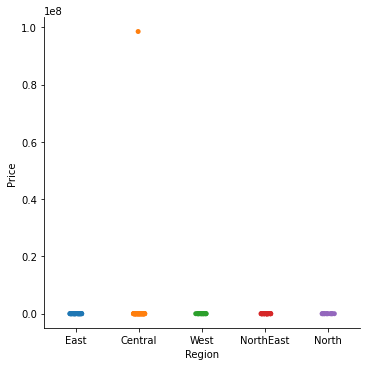

In [81]:
sns.catplot(x="Region", y='Price', data = df)

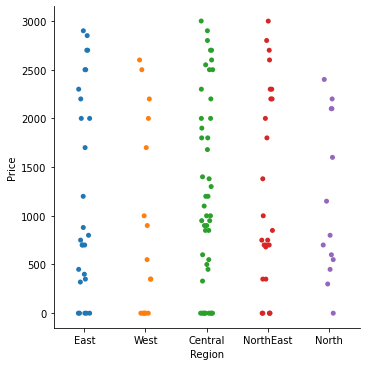

In [87]:
df2 = df[df["Price"] < df["Price"].quantile(0.99)]
df2.shape
sns.catplot(x="Region", y='Price', data = df2)